In [69]:
import networkx as nx
import re

In [70]:
web_graph = nx.read_gpickle('web_graph.gpickle')

In [71]:
web_graph

In [72]:
web_graph.nodes[50]

{'pos': [0.8133465672903285, 0.5789147440078531],
 'page_content': 'Sports: Giddy Phelps Touches Gold for First Time Michael Phelps won the gold medal in the 400 individual medley and set a world record in a time of 4 minutes 8.26 seconds.'}

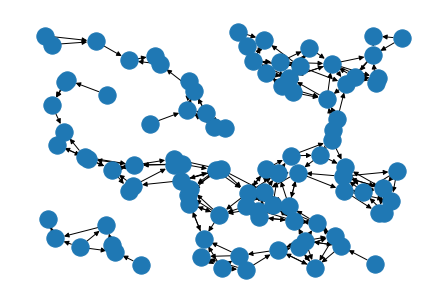

In [73]:
pos = {i: web_graph.nodes[i]['pos'] for i in range(len(web_graph.nodes))} 
nx.draw(web_graph, pos)

In [74]:
# Create a postings list
postings_list = {}
for i in range(len(web_graph.nodes)):
    node = web_graph.nodes[i]
    content = node['page_content']
    content = re.sub(r'[^\w\s]', '', content)
    content = re.sub(r'\s+', ' ', content)
    content = content.lower()
    content = [c for c in content.split(' ') if c != '' and len(c) > 2]
    for word in content:
        if word not in postings_list:
            postings_list[word] = [i]
        elif postings_list[word][-1] != i:
            postings_list[word].append(i)

In [75]:
def generate_sets(query_word, postings_list):
    """
    Generates the root and base sets for the query word
    """
    if query_word not in postings_list:
        raise Exception('Word not in the postings list')
    root_set = postings_list[query_word]
    base_set = []
    for node in root_set:
        base_set.append(node)
    print(base_set)

In [76]:
generate_sets('sports', postings_list)

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]


In [77]:
web_graph.edges

OutEdgeView([(0, 3), (0, 61), (1, 28), (1, 54), (1, 76), (2, 67), (3, 10), (4, 9), (4, 12), (4, 23), (4, 86), (5, 25), (6, 14), (6, 22), (6, 29), (6, 36), (7, 81), (8, 66), (9, 56), (9, 78), (9, 91), (10, 0), (10, 61), (10, 75), (11, 62), (11, 65), (12, 9), (12, 86), (12, 90), (12, 91), (12, 97), (13, 48), (13, 62), (13, 65), (13, 98), (14, 22), (14, 29), (14, 36), (14, 59), (14, 93), (15, 8), (15, 17), (15, 31), (15, 66), (15, 77), (16, 69), (16, 88), (17, 66), (18, 34), (18, 61), (18, 71), (18, 86), (19, 20), (19, 39), (20, 95), (21, 50), (21, 73), (21, 76), (22, 6), (22, 14), (22, 38), (22, 56), (23, 4), (23, 58), (23, 94), (23, 97), (23, 98), (24, 30), (25, 2), (26, 30), (27, 32), (27, 47), (27, 54), (27, 74), (28, 76), (29, 36), (30, 1), (30, 76), (31, 17), (31, 66), (31, 67), (32, 60), (32, 63), (32, 64), (32, 74), (32, 76), (33, 19), (33, 39), (33, 41), (33, 89), (34, 96), (35, 42), (35, 44), (35, 81), (36, 93), (37, 4), (37, 90), (38, 14), (38, 29), (38, 46), (39, 19), (39, 45)